# Unsupervised Machine Learning using Linear Regression Model to predict scores of student in a test based on the number of hours spent studying

Importing all the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Downloads/studyhours.csv',encoding = "utf-8") #path of csv file on my local system
df = pd.DataFrame(data = data)
df.head(10)
# data of first 10 students

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Visualization through Scatter Plot

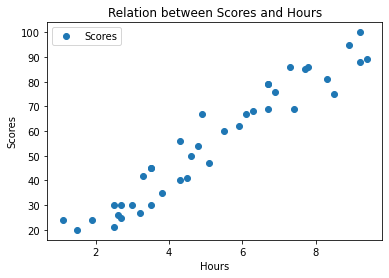

In [28]:
df.plot(x = "Hours", y = "Scores", style = 'o' )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Relation between Scores and Hours")
plt.show()

In [15]:
df['Hours'].corr(df['Scores'])

0.9620128094449241

In [21]:
# seperating the hours and score into lists from our dataset to form coordinates
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]
 [3. ]
 [9.4]
 [4.3]
 [3.5]
 [6.7]
 [9.2]
 [4.6]
 [6.7]
 [6.3]
 [3.5]
 [4.9]
 [6.7]
 [7.3]
 [4.3]
 [2.6]]
[ 21  47  27  75  30  20  88  60  81  25  85  62  41  42  24  95  30  24
  67  69  30  54  35  76  86  30  89  40  45  79 100  50  79  68  45  67
  69  86  56  26]


In [26]:
#splitting our data into test and train value sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

## Predicting Score of Students

In [27]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
try:
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
except:
    raise RuntimeError("Regression model training couldn't be performed")
else:
    print("Regression model training successfully.")

Regression model training successfully.


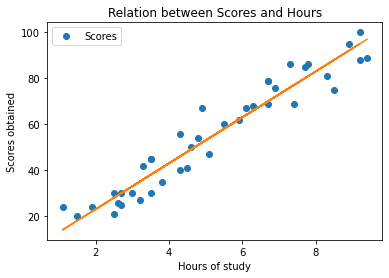

In [29]:
#visualizing the regression on a graph
df.plot(x = "Hours", y = "Scores", style = 'o')
line = regressor.coef_ * X_train + regressor.intercept_ # y = mx + c format
plt.plot(X_train, line)
plt.title("Relation between Scores and Hours")
plt.xlabel("Hours of study")
plt.ylabel("Scores obtained")
plt.show()

In [35]:
#DataFrame to compare actual vs predicted values
predicted_values = regressor.predict(X_test)
comparison = pd.DataFrame({"Actual Value:" : Y_test, "Predicted Value:" : predicted_values})
print(comparison)

   Actual Value:  Predicted Value:
0             86         75.970522
1             67         64.004939
2             20         18.136872
3             76         71.981994
4             26         29.105323
5             88         94.916028
6             42         36.085246
7             81         85.941841
8             45         38.079510
9             68         65.999203


In [49]:
#input hours studied by student to predict the score the student might get in the test
hours_studied = float(input("Enter number of hours studied by the student: "))
prediction = regressor.predict([[hours_studied]]).reshape(1)
x = float(prediction[0])
x = "{:0.2f}".format(x)
print("The student might score {} after studying for {} hours".format(x, hours_studied))

Enter number of hours studied by the student: 4.5
The student might score 48.05 after studying for 4.5 hours


## Measure of Error
Error in a regressive model can be measured by using RMSE. MAE would be a good option for assessing this model as it doesn't penalise outliers as harshly as RMSE or MSE.

In [53]:
# Root Mean Square Error for Regression Model
error = ((((Y_test - predicted_values)**2).sum()/len(predicted_values)) ** 0.5)
print(round(error, 3))

5.459
